In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
%matplotlib inline

In [47]:
df=pd.read_csv("data.csv",names=["English speaker","Course instructor","Course","Semester","Class size","Class attribute"])

   1. Whether or not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

# EDA

In [48]:
df.shape

(151, 6)

In [50]:
df.sample(5)

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
48,2,15,3,1,20,3
53,2,6,17,2,42,2
36,2,4,16,2,21,1
24,2,15,13,2,37,2
28,2,21,2,2,42,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   English speaker    151 non-null    int64
 1   Course instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Semester           151 non-null    int64
 4   Class size         151 non-null    int64
 5   Class attribute    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [52]:
df.describe()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


### Observations

1. Maximum number of students in class is 66 


## Finding Missing values

In [53]:
df.isnull().sum()

English speaker      0
Course instructor    0
Course               0
Semester             0
Class size           0
Class attribute      0
dtype: int64

There are no missing values in dataset

In [54]:
df.corr()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
English speaker,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


In [ ]:
df.head()

<Axes: >

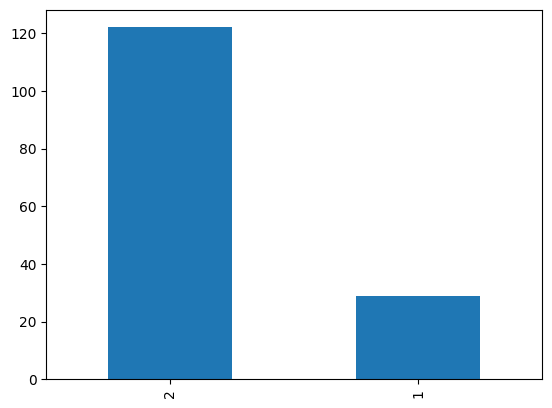

In [55]:
df["English speaker"].value_counts().plot(kind='bar')


<Axes: >

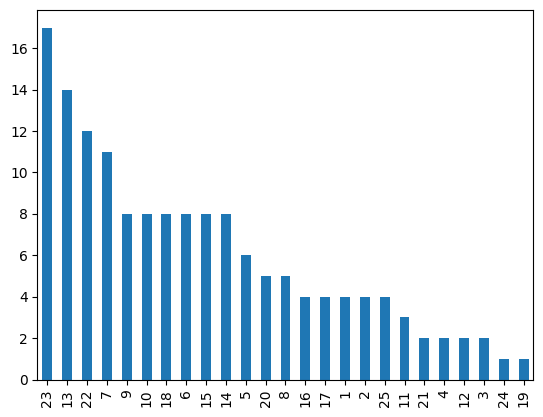

In [56]:
df["Course instructor"].value_counts().plot(kind='bar')


<Axes: >

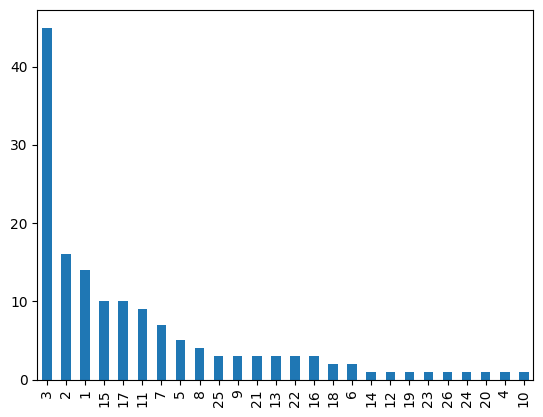

In [57]:
df["Course"].value_counts().plot(kind='bar')

<Axes: >

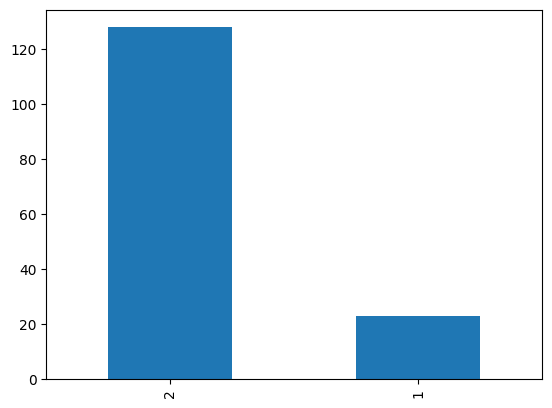

In [58]:

df["Semester"].value_counts().plot(kind='bar')


<Axes: >

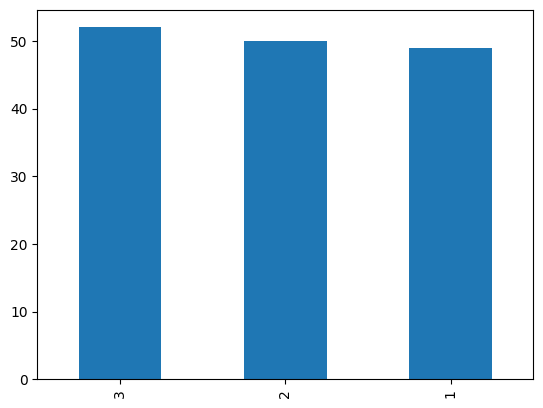

In [59]:
df["Class attribute"].value_counts().plot(kind='bar')

## Bivariate analysis

In [60]:
df.sample(5)

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
80,2,16,19,2,11,3
51,2,18,21,2,29,3
132,2,14,23,2,17,2
65,2,8,3,2,24,2
105,2,20,2,2,25,2


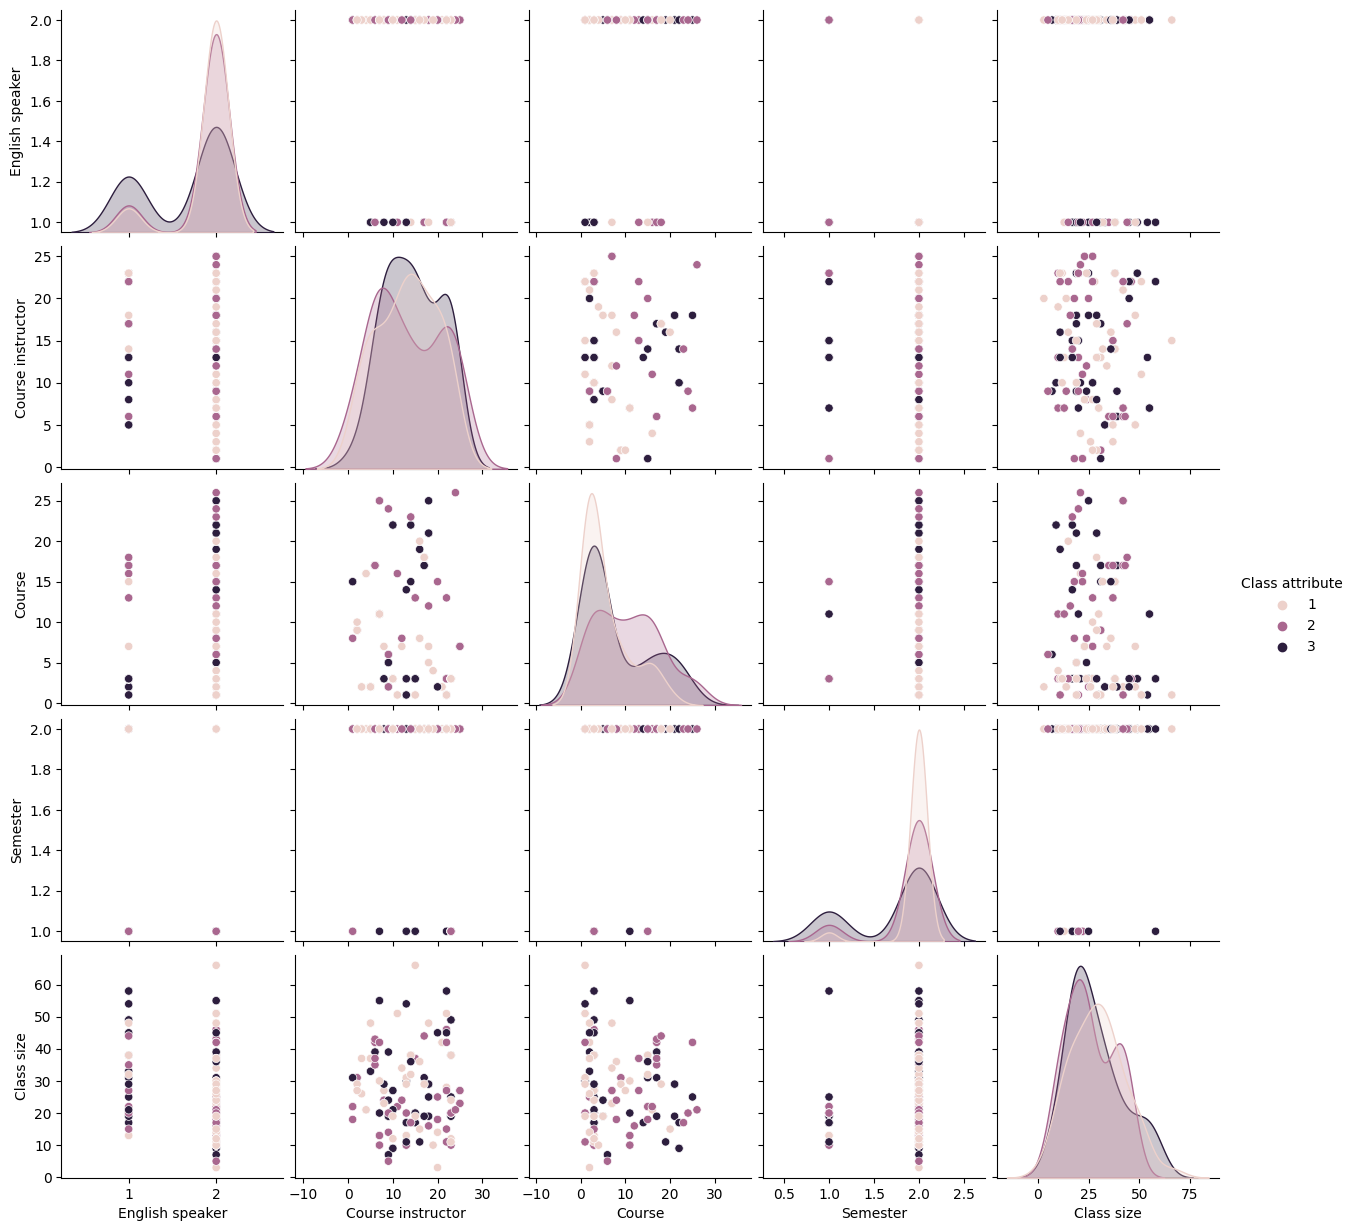

In [61]:
sns.pairplot(df,hue="Class attribute")

<Axes: xlabel='English speaker', ylabel='Class size'>

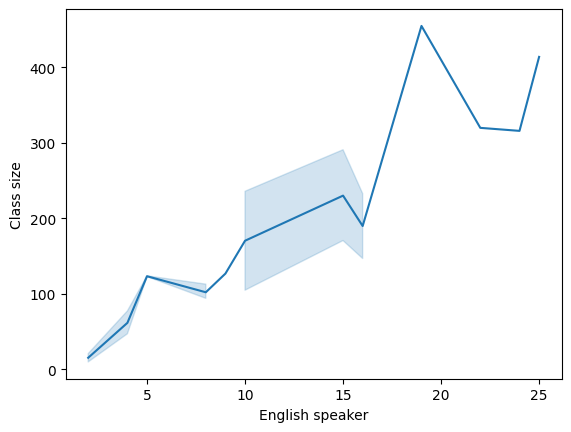

In [62]:
new=df.groupby(["Course instructor"]).sum().reset_index()
sns.lineplot(x=new["English speaker"],y=new["Class size"])

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop('Class attribute', axis=1)
y = df["Class attribute"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

#saved the model
filename = "rf_clf.joblib"
joblib.dump(rf_clf, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print("Socre of model : ",result)

RandomForestClassifier(n_estimators=1000, random_state=42)

predrf = rf_clf.predict(X_train)
print(f"Accuracy Score:{accuracy_score(y_train,predrf)*100:.2f}%")
precision = precision_score(y_train,predrf,average='micro')
recall = recall_score(y_train,predrf,average='micro')
f1 = f1_score(y_train,predrf,average='micro')


print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Socre of model :  0.717391304347826
Accuracy Score:97.14%
Precision: 0.97
Recall: 0.97
F1-score: 0.97
